## Crop and Fertilizer Recommendation Sustem using ML

In [2]:
# Importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Loading the dataset
crop=pd.read_csv("data set/Crop_recommendation.csv")

In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.tail()


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
crop.shape

(2200, 8)

In [7]:
crop.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [8]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# to check the missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
# to check duplicate values
crop.duplicated().sum()

np.int64(0)

In [12]:
# to check the statistics of the dataset
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
# ckeck the target feature distribution
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [15]:
#  Removes rows with missing values.
crop.dropna()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [17]:
#  Fills missing values with a specific value.
crop.fillna(7)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [20]:
# Selecting specific columns:
crop[['temperature', 'humidity']]

,temperature,humidity
0,20.879744,82.002744
1,21.770462,80.319644
2,23.004459,82.320763
3,26.491096,80.158363
4,20.130175,81.604873
...,...,...
2195,26.774637,66.413269
2196,27.417112,56.636362
2197,24.131797,67.225123
2198,26.272418,52.127394


In [21]:
# Filtering rows based on condition:
crop[crop['rainfall'] > 200]

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1884,2,30,30,26.001751,94.799984,6.331052,209.540094,coconut
1886,8,15,33,28.973187,98.098610,5.501580,213.901102,coconut
1892,3,9,35,26.916419,99.846716,6.318553,225.632366,coconut
1894,27,8,30,26.446001,98.299378,6.008386,221.225817,coconut


In [23]:
# Using multiple conditions:
crop[(crop['rainfall'] > 200) & (crop['temperature'] > 25)]

,N,P,K,temperature,humidity,ph,rainfall,label
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
10,91,53,40,26.527235,81.417538,5.386168,264.614870,rice
12,78,58,44,26.800796,80.886848,5.108682,284.436457,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
21,76,40,43,25.157455,83.117135,5.070176,231.384316,rice
...,...,...,...,...,...,...,...,...
1884,2,30,30,26.001751,94.799984,6.331052,209.540094,coconut
1886,8,15,33,28.973187,98.098610,5.501580,213.901102,coconut
1892,3,9,35,26.916419,99.846716,6.318553,225.632366,coconut
1894,27,8,30,26.446001,98.299378,6.008386,221.225817,coconut


In [24]:
# Grouping data by crop type and calculating averages:
crop.groupby('label')[['N', 'P', 'K']].mean()

,N,P,K
label,,,
apple,20.80,134.22,199.89
banana,100.23,82.01,50.05
blackgram,40.02,67.47,19.24
chickpea,40.09,67.79,79.92
coconut,21.98,16.93,30.59
coffee,101.20,28.74,29.94
cotton,117.77,46.24,19.56
grapes,23.18,132.53,200.11
jute,78.40,46.86,39.99


In [25]:
# Counting occurrences of each crop type:
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [26]:
# Sort values by rainfall (ascending/descending):
crop.sort_values(by='rainfall', ascending=False)

,N,P,K,temperature,humidity,ph,rainfall,label
43,82,40,40,23.830675,84.813601,6.271479,298.560117,rice
38,60,43,44,21.019447,82.952217,7.416245,298.401847,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
72,79,42,37,24.873007,82.840226,6.587919,295.609449,rice
19,88,35,40,23.579436,83.587603,5.853932,291.298662,rice
...,...,...,...,...,...,...,...,...
1454,95,21,47,27.931142,93.561614,6.431971,20.661278,muskmelon
1446,106,20,51,29.730197,90.970157,6.342573,20.490356,muskmelon
1463,84,29,49,29.943492,93.907412,6.251420,20.390205,muskmelon
1424,102,25,50,28.204808,92.914404,6.099662,20.360011,muskmelon


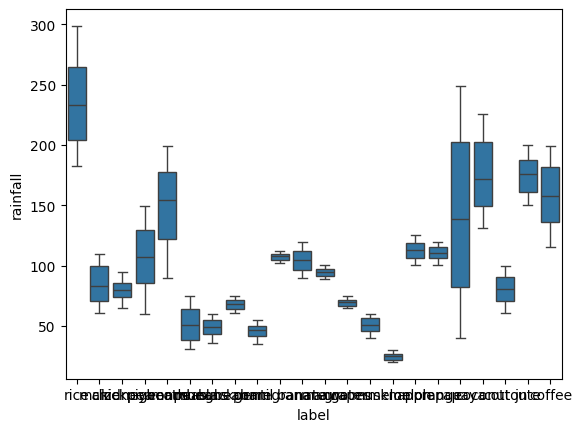

In [30]:
# Heatmap for correlation matrix:
sns.boxplot(x='label', y='rainfall', data=crop)
plt.show()